---
# 1. IMPORT LIBARIES

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm          import SVC

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

--- 
# 2. LOAD IRIS-DATASET 
SKLEARN can use even multiclass regression (parameter multi_class=`multinominal` or `ovr` as oneVersusRest) for more than one (1) class separation

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
print("Shape von X: ", X.shape)
print("Feature-Names: ", iris.feature_names)
y = iris.target
print("Shape von y: ", y.shape)
print("Names zu den Klassen: ", iris.target_names)
print("Klassenbezeichnungen als Zahlen: ", np.unique(y))
print("Shape von X/y: ", X.shape, " / ", y.shape)

Shape von X:  (150, 2)
Feature-Names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape von y:  (150,)
Names zu den Klassen:  ['setosa' 'versicolor' 'virginica']
Klassenbezeichnungen als Zahlen:  [0 1 2]
Shape von X/y:  (150, 2)  /  (150,)


---
# PREPARE DATA

## 1. TRAIN_TEST_SPLIT

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.3, stratify=y)
print("Bezeichner in y: ",     np.bincount(y))
print("Bezeichner in train: ", np.bincount(y_train))
print("Bezeichner in test: ",  np.bincount(y_test))

Bezeichner in y:  [50 50 50]
Bezeichner in train:  [35 35 35]
Bezeichner in test:  [15 15 15]


## 2. STANDARDIZE VALUES

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

---
# MODEL: SUPPORT VECTOR MACHINES (SVM)

## 1. FIT MODEL ON DATA

In [5]:
# Der Parameter C gibt an, wie streng die Margin maximiert werden soll --> kleiner Wert ist strenger / großer Wert weniger Streng (Annpassung der Schlupfvariable)
svm = SVC(C=1, kernel="linear", random_state=1)
svm.fit(X=X_train_std, y=y_train)

SVC(C=1, kernel='linear', random_state=1)

---
# PLOT DATA AND VISUALIZE RESULTS

In [32]:
def plot_decision_regions(X :np.array, y :np.array, classifier: object, test_idx=None, resolution=.005):
    # Markierungen und Farben
    markers = ('s', 'x', 'o', 'v', '^')
    colors  = ("red", "green", "blue", "lightgreen", "cyan")
    cmap    = ListedColormap(colors[:len(np.unique(y))])

    # Plotten Entscheidungsgrenze
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plotten aller Exemplare
    for idx, cl in enumerate(np.unique(y)):
        print("Index: ", idx)
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=iris.target_names[cl],
                    edgecolors='hotpink')
    
    # Exemplare der Testdatenmenge hervorheben -> wir kreisen diese Punkte explizit ein
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], 
                    X_test[:,1],
                    c='',
                    edgecolors='hotpink',
                    alpha=1.0,
                    linewidths=1, 
                    marker='o',
                    s=100,
                    label='Testdaten')


In [33]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined     = np.hstack((y_train, y_test))

Index:  0
Index:  1
Index:  2


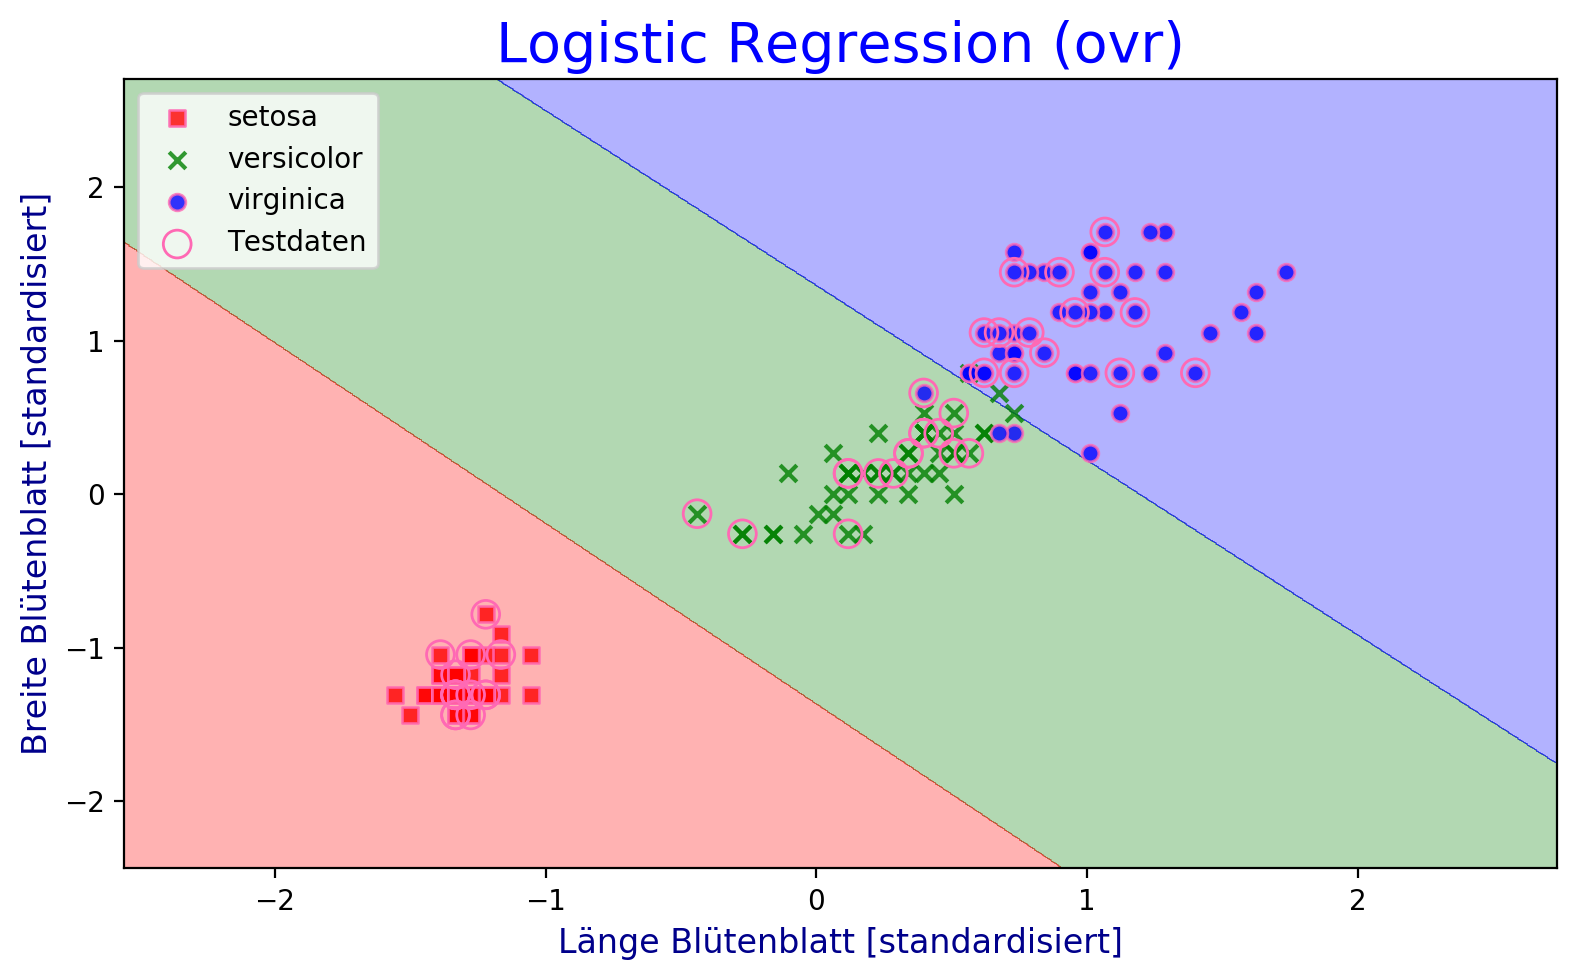

In [34]:
figure(figsize=(8,5), dpi=200)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel("Länge Blütenblatt [standardisiert]", fontdict={"color":"darkblue", "size":12})
plt.ylabel("Breite Blütenblatt [standardisiert]", fontdict={"color":"darkblue", "size":12})
plt.title("Logistic Regression (ovr)", fontdict={"color":"blue", "size":20})
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

---
# ALTERNATIVE BIBLIOTHEKEN ANSTATT `LIBLINEAR` (Perceptron, LogisticRegression) und `LIBSVM` (Support Vector Machines)

## Man kann über den SGDClassifier ebenfalls die drei Typen einladen -> aber mit deutlich reduzierten Verbrauch an Arbeitsspeicher 
die Modelle Perceptron, Logistic Regression und SVM haben alle den Nachteil, dass sie in den Arbeitspeicher des lokalen PC passen müssen, was bei großen Datenmengen schon zu Problemen führen kann

In [35]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
ppn = SGDClassifier(loss='perceptron')

---
# LÖSEN VON NICHT-LINEAREN PROBLEMSTELLUNGEN MIT SVM

### Normalverteilung anlegen 200x2 

In [36]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
print("Dimensions: ", X_xor.ndim, ", with Shape: ", X_xor.shape)

Dimensions:  2 , with Shape:  (200, 2)


### Standardnormalverteilung der beiden Spalten als Histogram abbilden

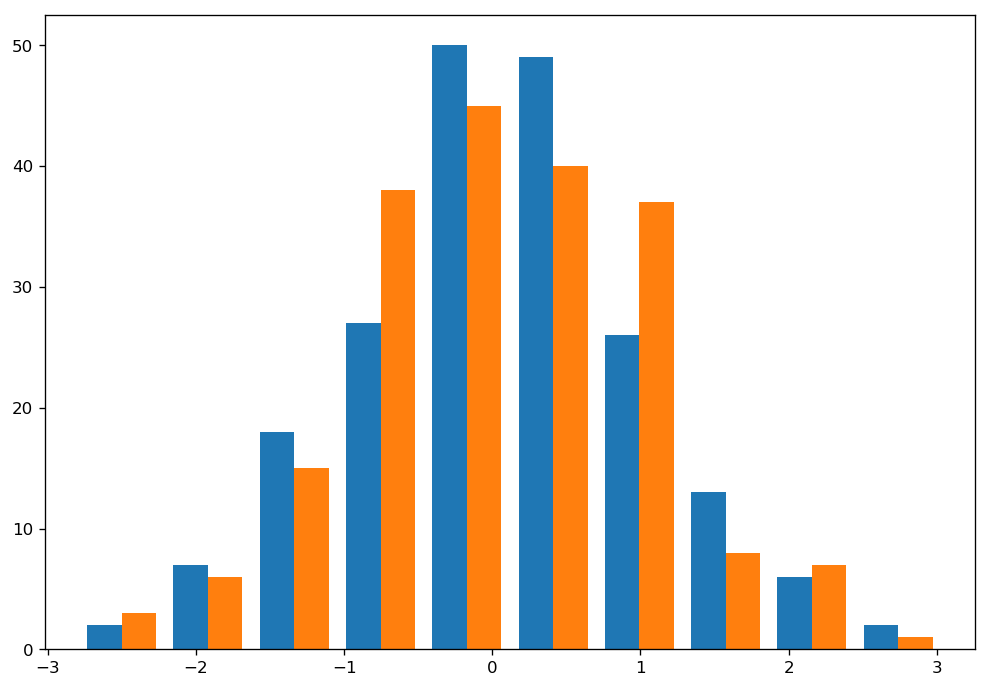

In [37]:
figure(figsize=(10,7), dpi=120)
plt.hist(X_xor)
plt.show()

### Jeweils die Werte > 0 pro Spalte auf True setzen

In [38]:
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)
y_xor

array([ True, False,  True,  True,  True,  True, False,  True, False,
       False,  True, False,  True, False,  True, False, False, False,
        True, False, False,  True,  True, False, False,  True, False,
        True, False, False,  True,  True,  True, False,  True, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True, False, False,  True, False,
       False,  True,  True, False, False,  True, False,  True,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False,  True,  True,  True, False,
        True,  True,

In [39]:
y_xor = np.where(y_xor, 1, -1)
y_xor

array([ 1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,
        1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,
       -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
        1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,
        1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,
        1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1])

### Wie man an nachfolgendem Plot erkennen kann, wäre ein linearer Algorithmus für ein derartiges Problem nicht ausreichend
Hier empfiehlt es sich über einen `KERNEL`-Ansatz zu gehen, der die Probleme in höhere Hyperebenen auslagern kann, um derartige<br>
Probleme zu lösen. Allerdings ist das natürlich mit mehr Rechenaufwand verbunden, insbesondere wenn die Anzahl der Merkmale (Features)<br>
steigt.

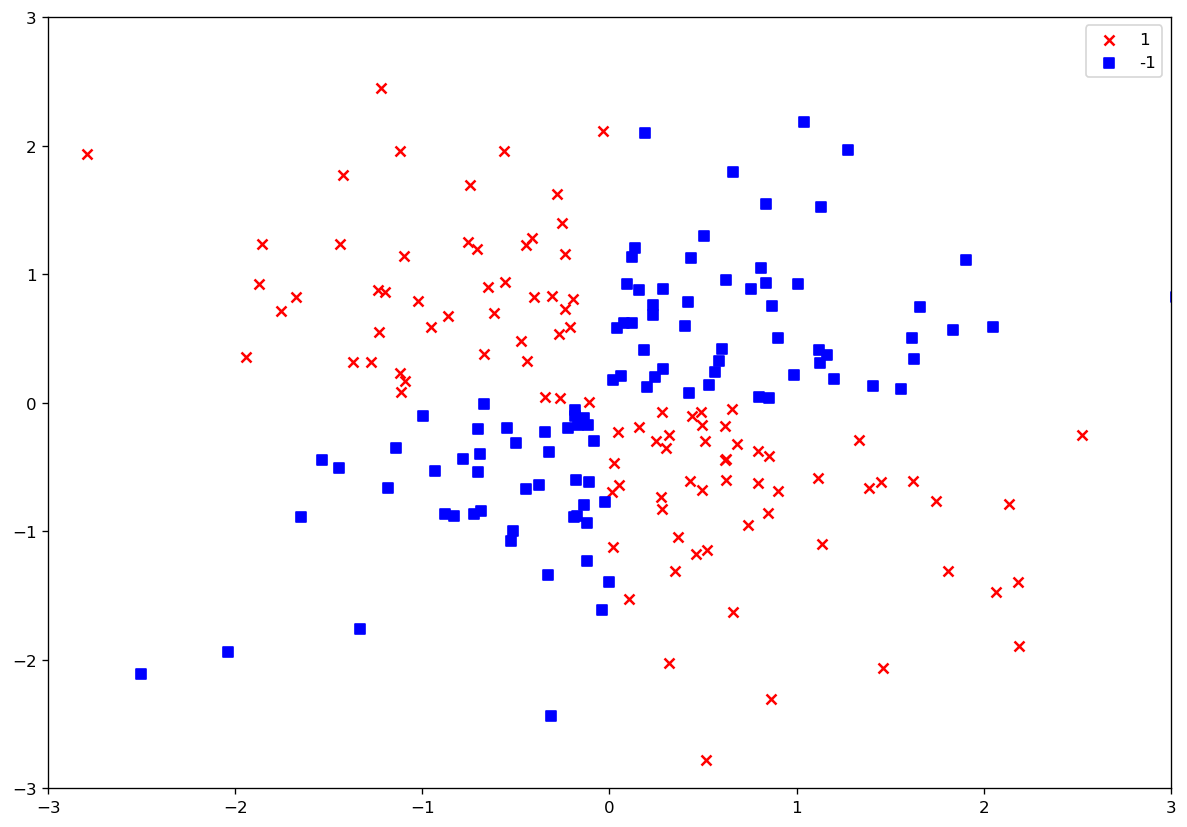

In [40]:
figure(figsize=(10,7), dpi=120)
plt.scatter(x=X_xor[y_xor == 1, 0],
            y=X_xor[y_xor == 1, 1],
            c='r',
            marker='x',
            label='1')
plt.scatter(x=X_xor[y_xor == -1, 0],
            y=X_xor[y_xor == -1, 1],
            c='b',
            marker='s',
            label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Wie man an beiden nachfolgenden Graphen sehen kann, hat der Parameter `GAMMA` entscheidenden Einfluss auf das Abschneiden der Spähren 
[...] daher auch die gefahr von `Overfitting` - siehe bitte ersten vs. zweiten Graphen, welcher deutlich glatter und nicht so exakt auf die Daten zugeschnitten ist.<br>
Wir bekommen also ein besser generalisiertes Modell!<br>
Nochmals zur Erinnerung: der Parameter `C` besagt, wie stark die Margin maximiert werden soll

Index:  0
Index:  1


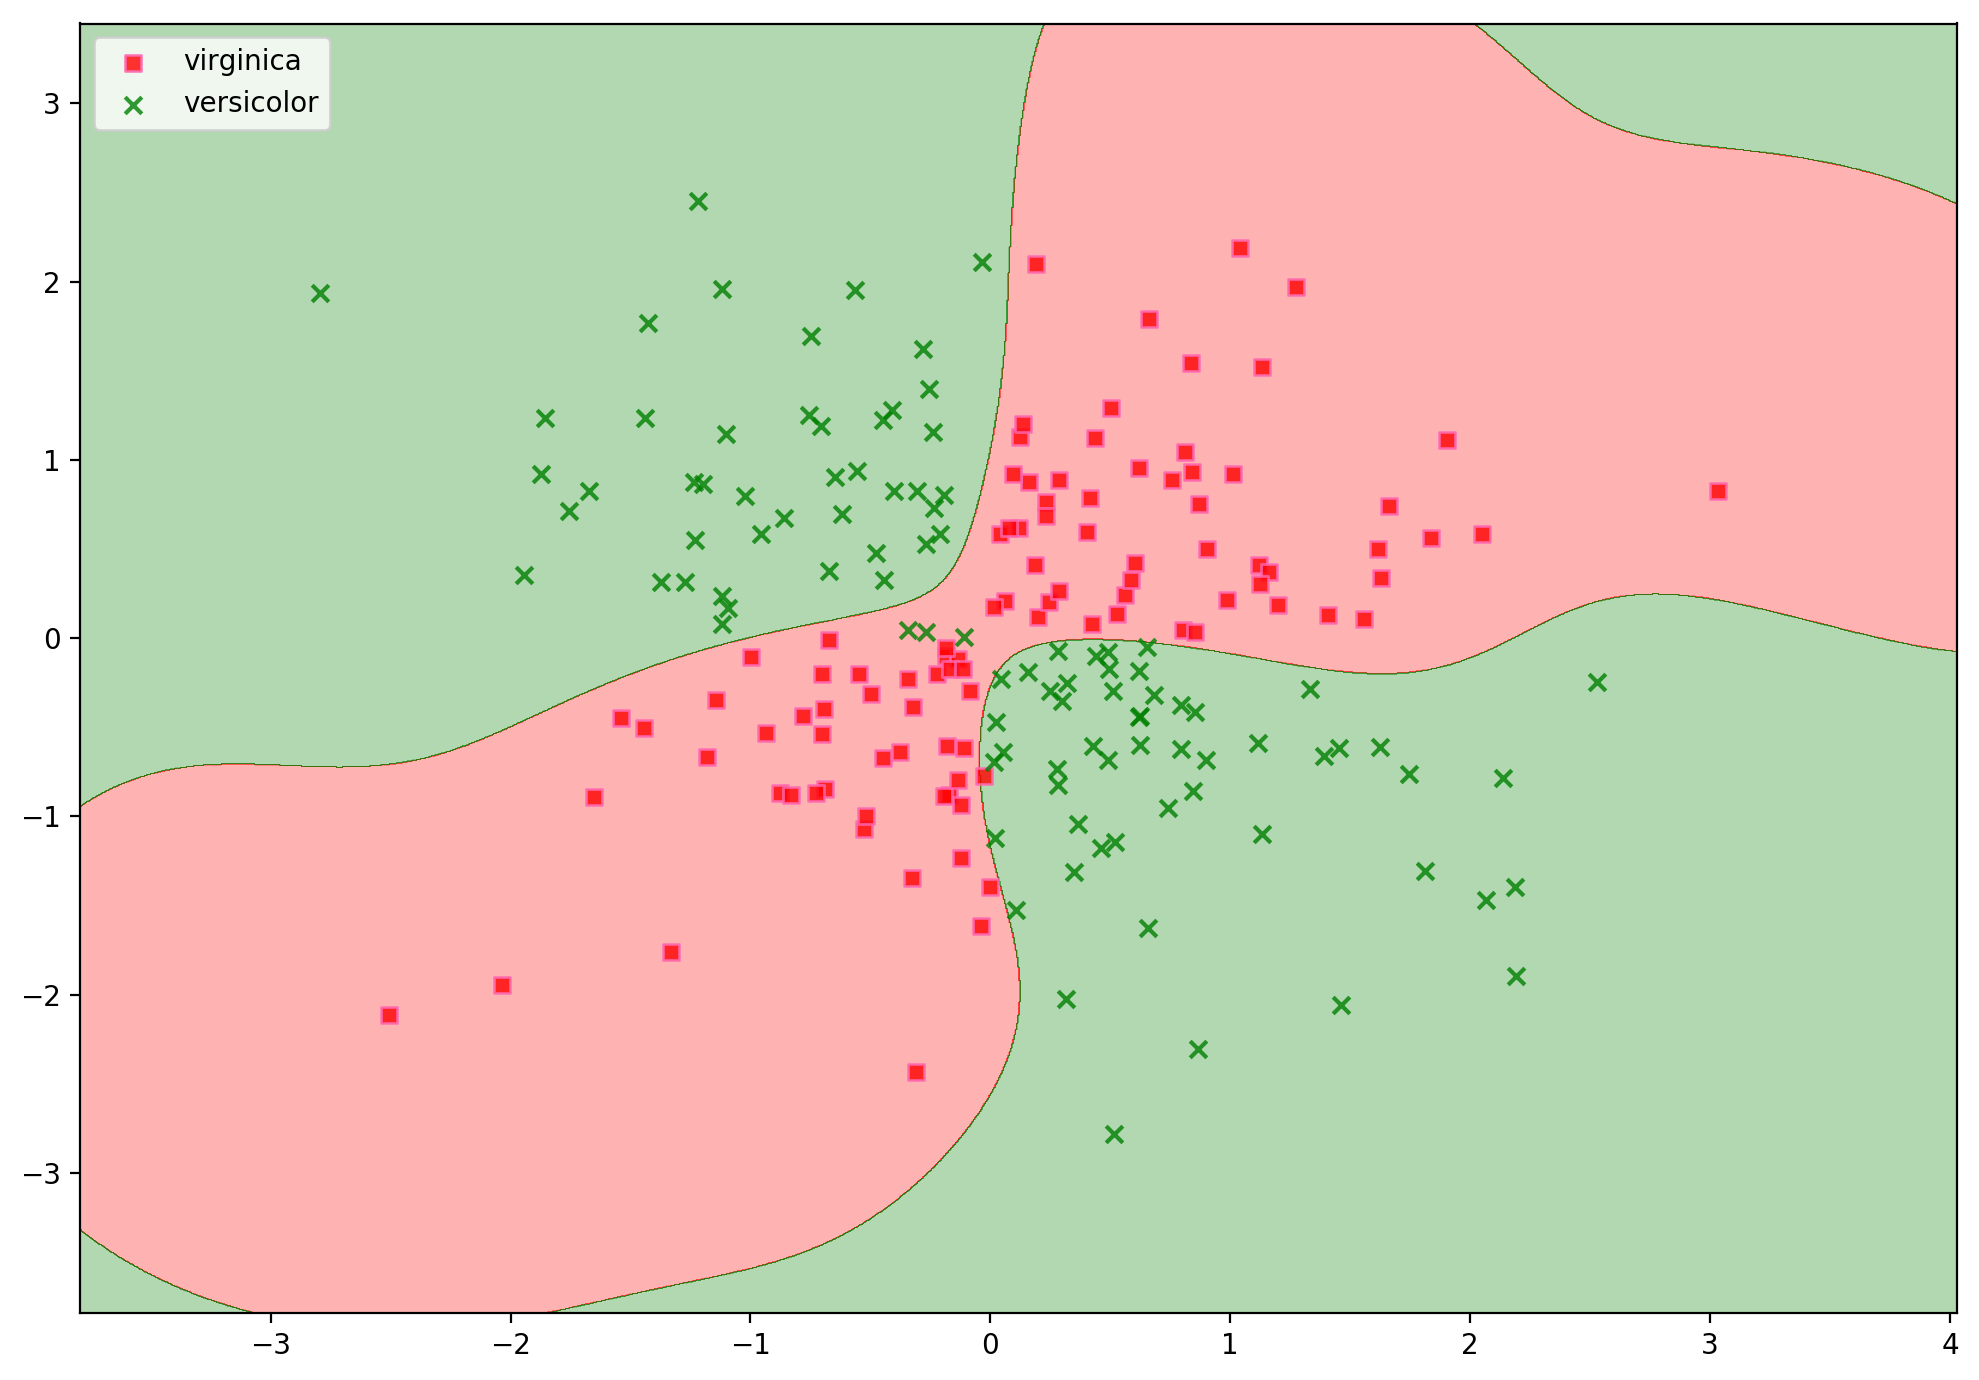

In [48]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.8, C=10)  # Hier wird also einfach nur der kernel-Parameter von linear durch rbf ersetzt!
svm.fit(X_xor, y_xor)
figure(figsize=(10,7), dpi=200)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

Index:  0
Index:  1


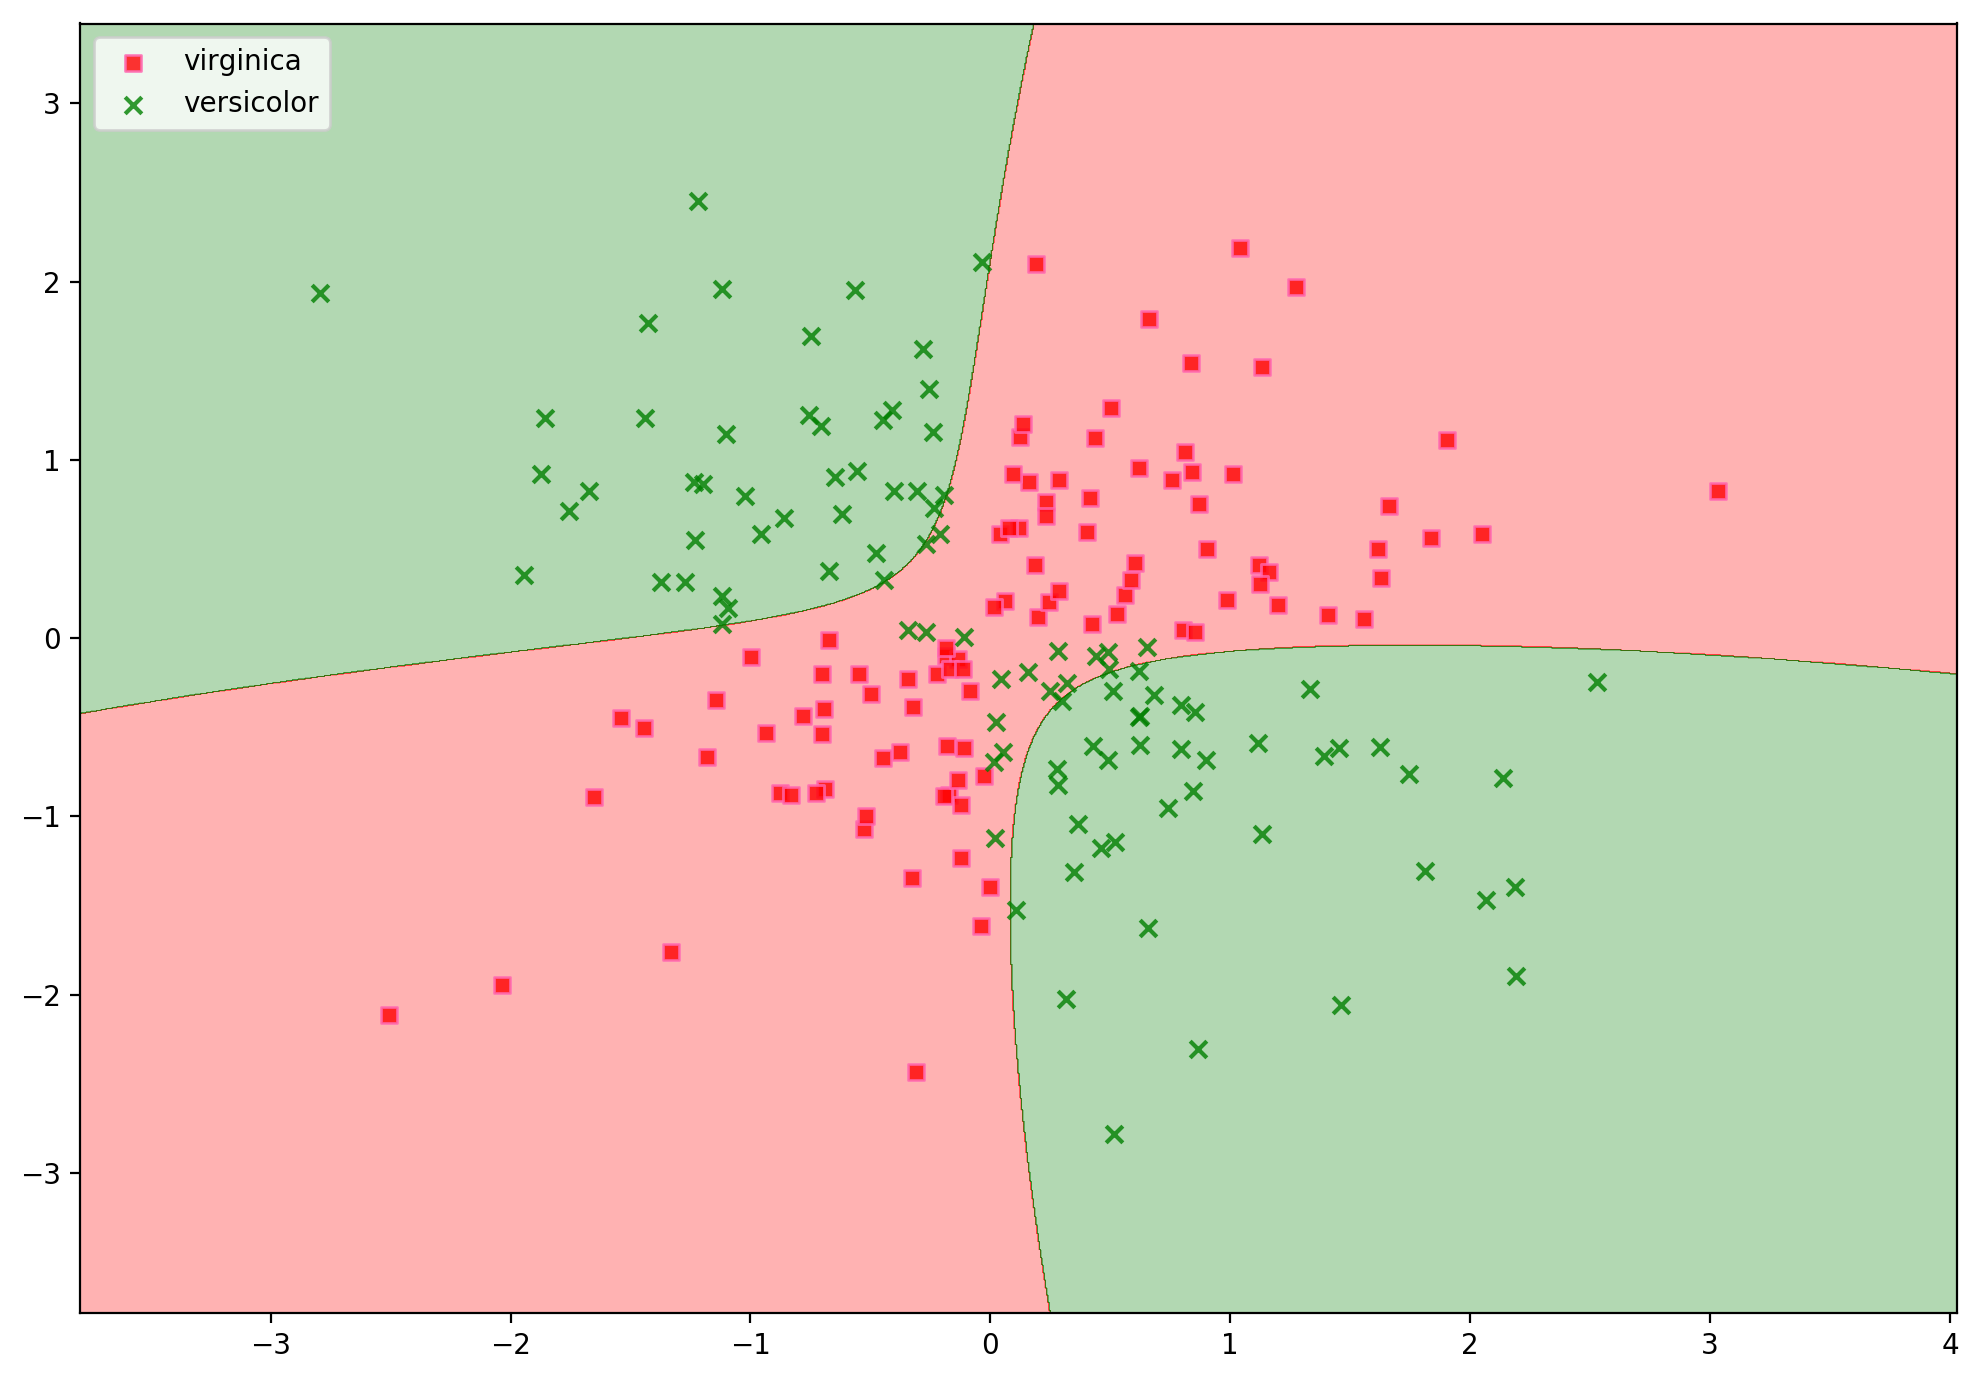

In [50]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10.0)  # Hier wird also einfach nur der kernel-Parameter von linear durch rbf ersetzt!
svm.fit(X_xor, y_xor)
figure(figsize=(10,7), dpi=200)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

### Nun wenden wir den Algorithmus auf die Iris Datensammlung an, um zu sehen, wie sich gamma hier auswirken würde
`GRAPH [1]` gamma = relativ klein auf `0.02` gewählt -> wir bekommen großflächige Glatte flächenbereiche zurück<br>
`GRAPH [2]` gamma = deutlich erhöht auf `100.0` -> hier haben wir fast punktgenau unsere Objekte getrennt voneinander umschlossen 

Index:  0
Index:  1
Index:  2


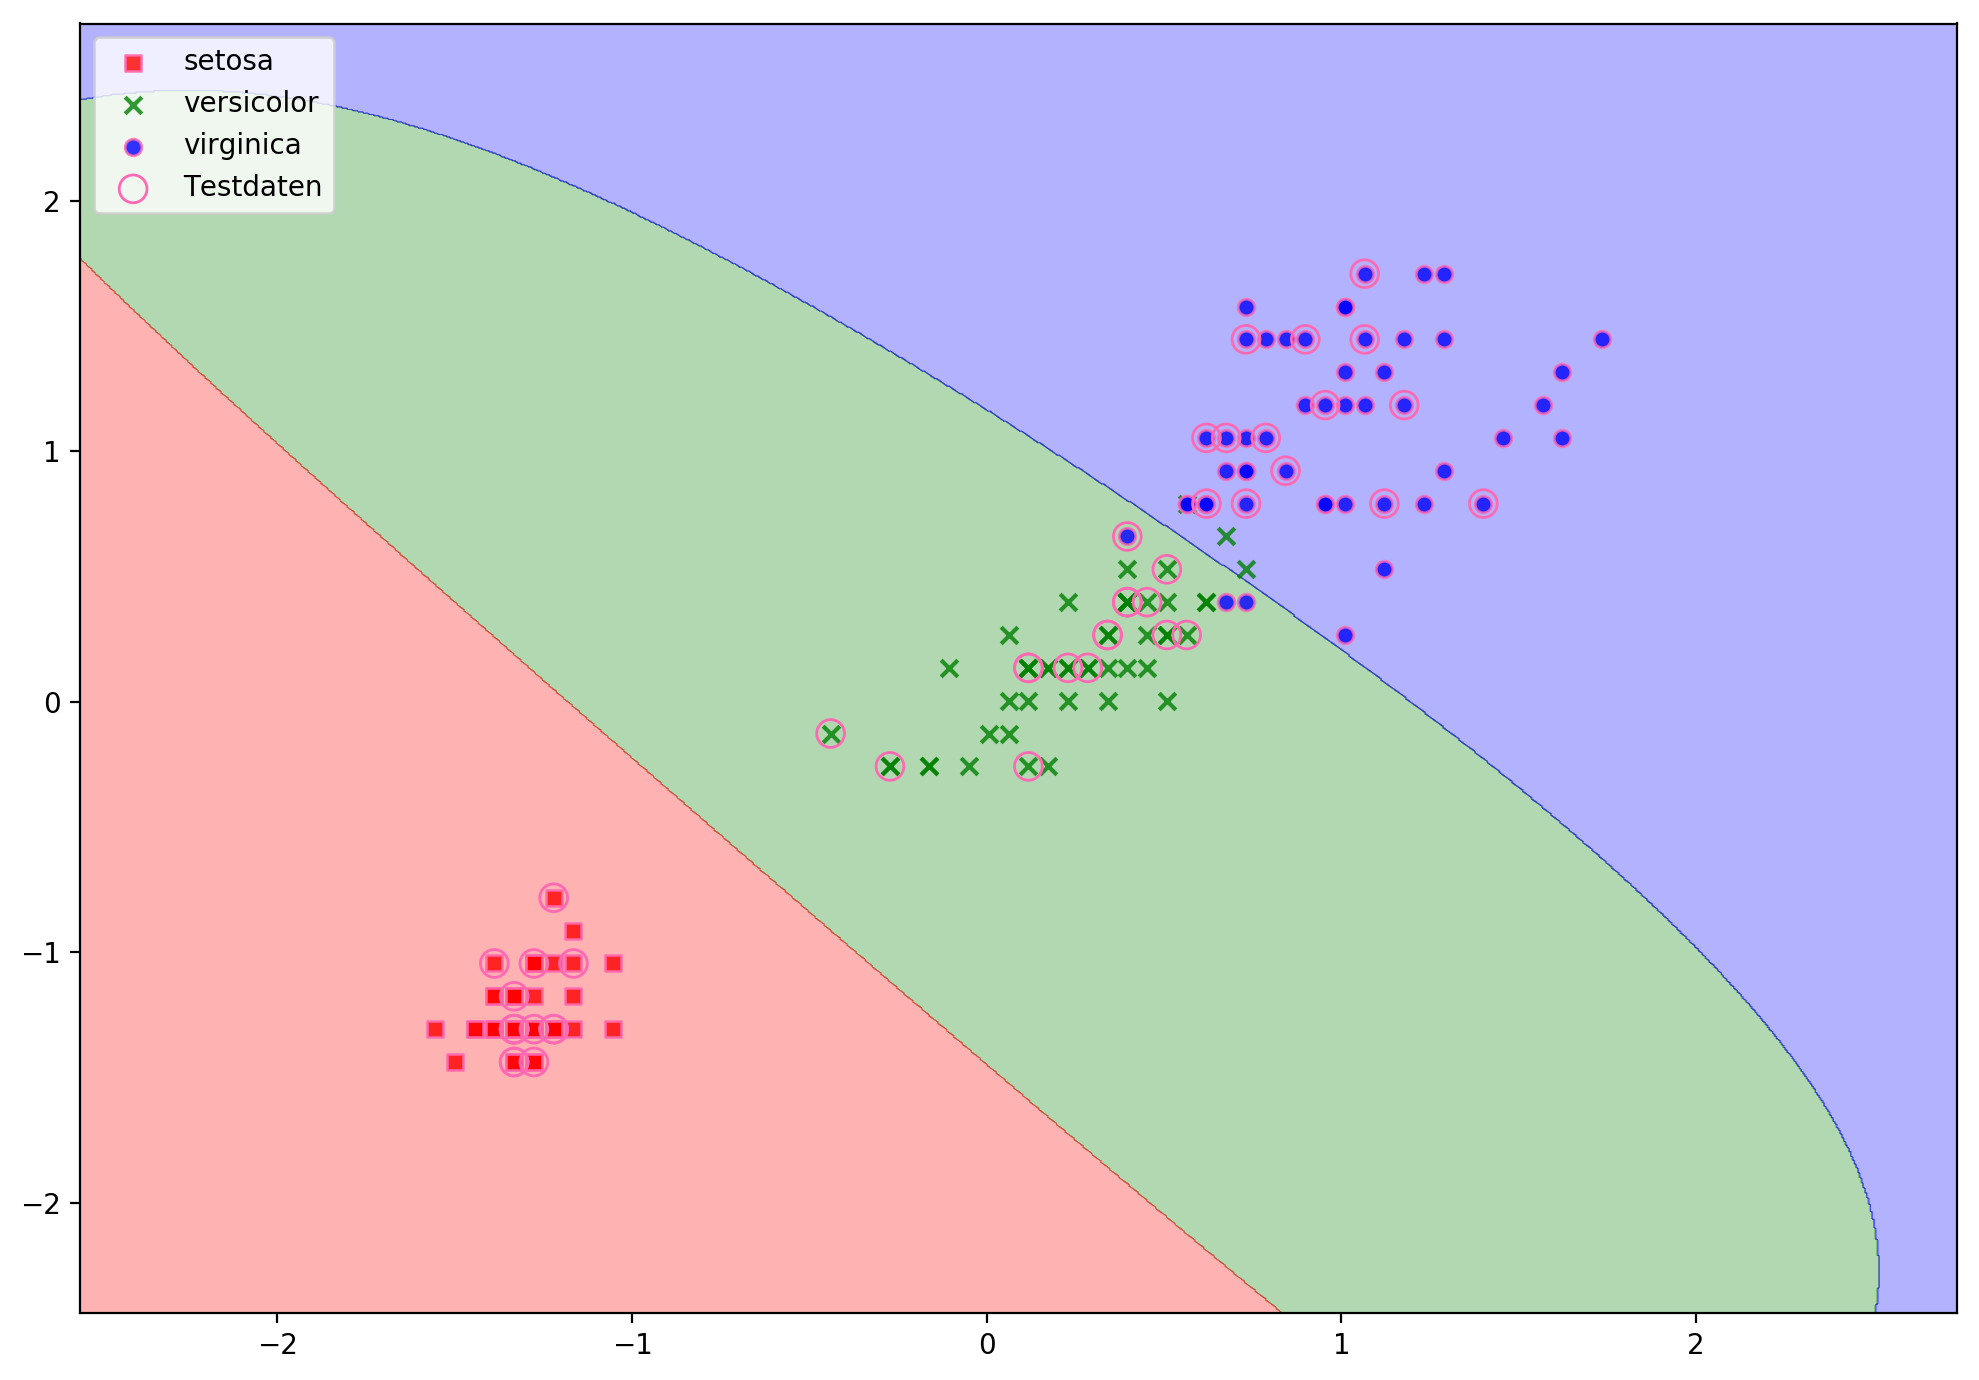

In [52]:
svm = SVC(kernel='rbf', random_state=1, gamma=.2, C=1.0)
svm.fit(X_train_std, y_train)

figure(figsize=(10,7), dpi=200)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

#### Wie man hier sehen kann, ist die Anpassung praktisch schon zu stark (`gut`), sodass es Probleme beim Generalisieren geben wird: `Overfitting`

Index:  0
Index:  1
Index:  2


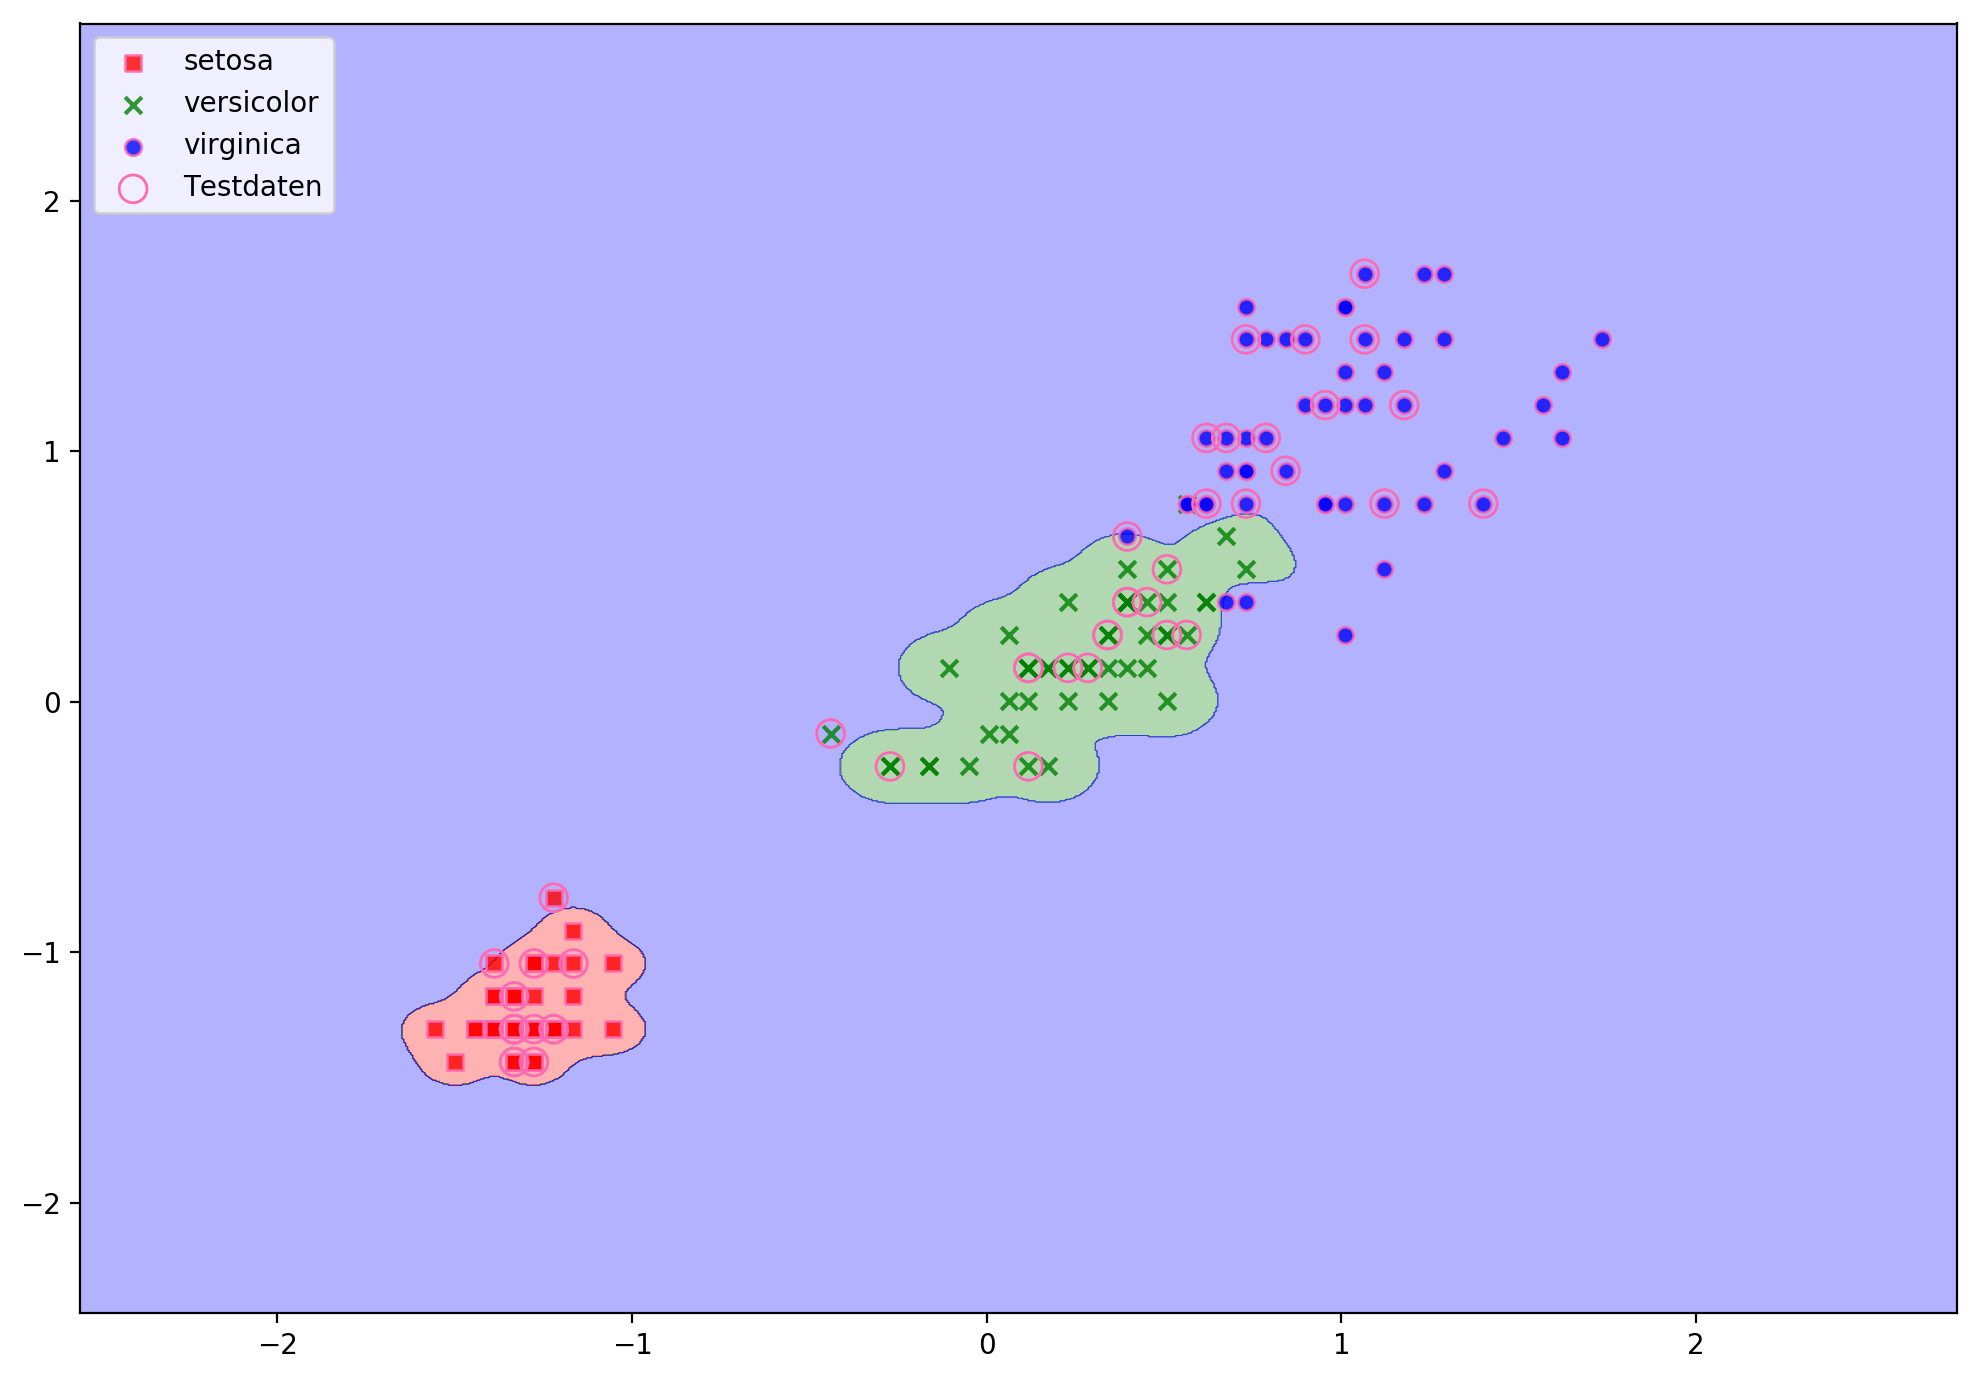

In [53]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

figure(figsize=(10,7), dpi=200)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()